# Links
- [Image Enhcancements](https://www.geeksforgeeks.org/image-enhancement-techniques-using-opencv-python/)

# Colour Correction
- [Link](https://www.geeksforgeeks.org/automatic-color-correction-with-opencv-and-python/)

In [1]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
from PIL import Image

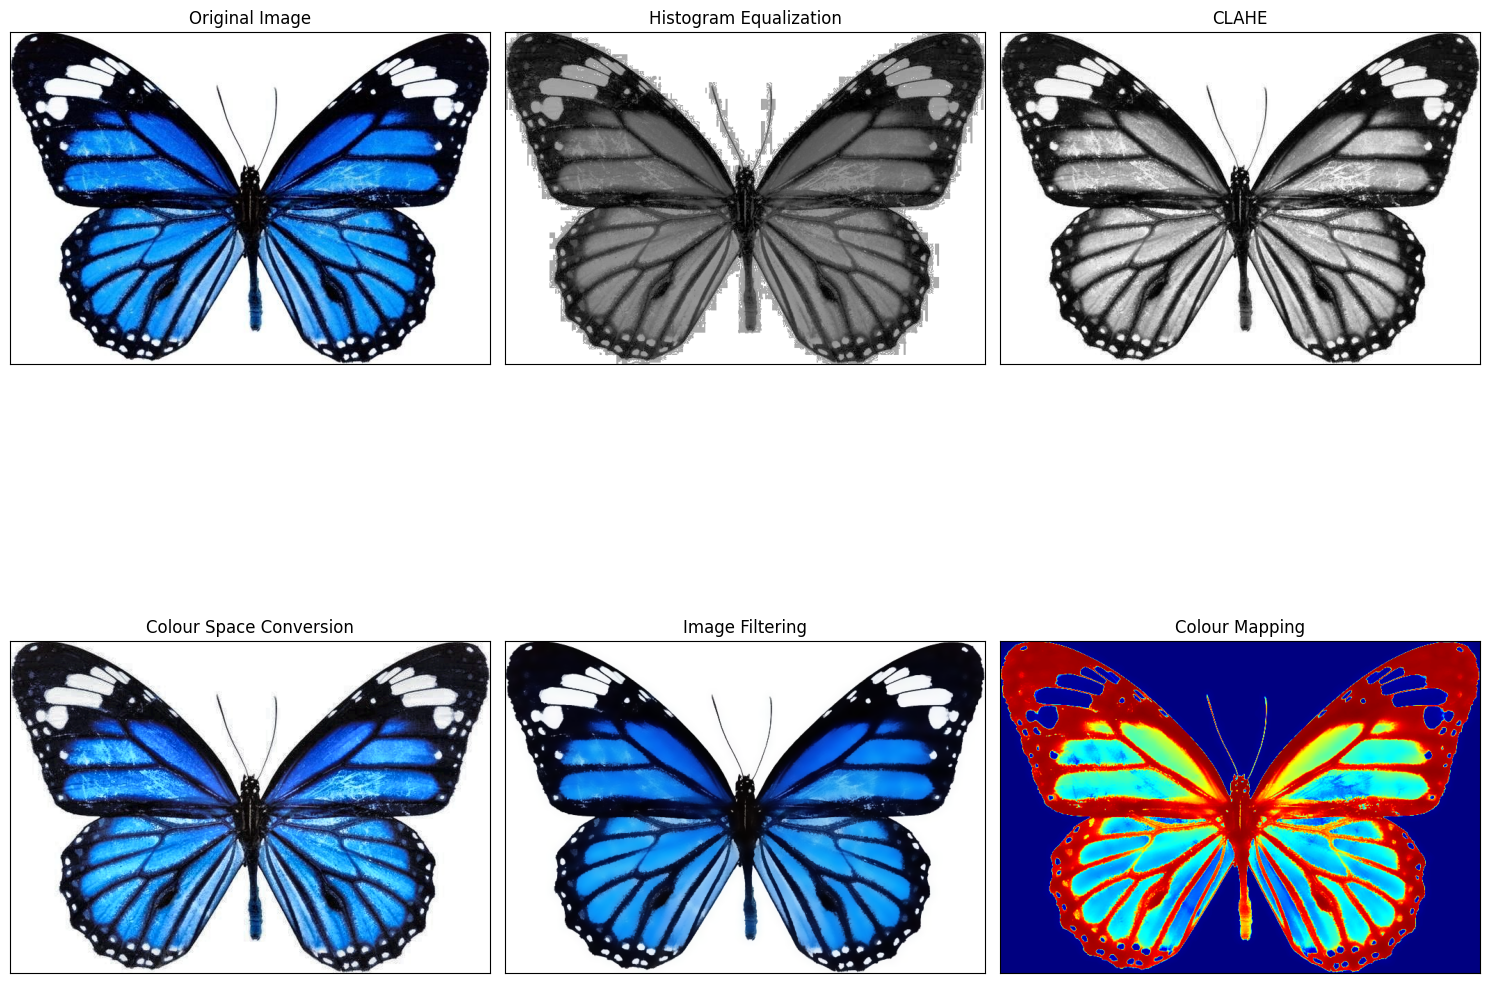

In [2]:
img = cv2.imread('./resources/Butterfly.jpg')

# Histogram Equalization
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(gray)

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray)

# Colour Space Conversion
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8)) 
l = clahe.apply(l)
lab = cv2.merge((l,a,b)) 
output = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR) 

# Image Filtering
filtered = cv2.bilateralFilter(img, 15, 75, 75) 

# Colour Mapping
map = cv2.applyColorMap(filtered, cv2.COLORMAP_JET)


fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
ax = axis.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(equalized, cmap='gray')
ax[1].set_title('Histogram Equalization')
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].imshow(clahe_img, cmap='gray')
ax[2].set_title('CLAHE')
ax[2].set_xticks([])
ax[2].set_yticks([])

ax[3].imshow(output)
ax[3].set_title('Colour Space Conversion')
ax[3].set_xticks([])
ax[3].set_yticks([])

ax[4].imshow(filtered)
ax[4].set_title('Image Filtering')
ax[4].set_xticks([])
ax[4].set_yticks([])

ax[5].imshow(map)
ax[5].set_title('Colour Mapping')
ax[5].set_xticks([])
ax[5].set_yticks([])

plt.tight_layout()

# Contrast Correction / Enhancement

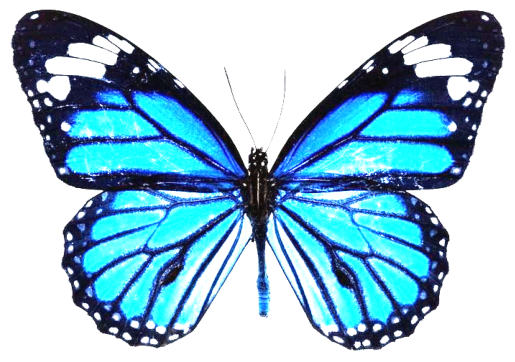

In [4]:
img = cv2.imread('./resources/Butterfly.jpg')

brightness = 10 
contrast = 2.3  
image2 = cv2.addWeighted(img, contrast, np.zeros(img.shape, img.dtype), 0, brightness) 


plt.imshow(image2)
plt.axis('off')
plt.show()


## Contrast Stretching / Normalization
- [Better Code Here](https://stackoverflow.com/questions/42257173/contrast-stretching-in-python-opencv)

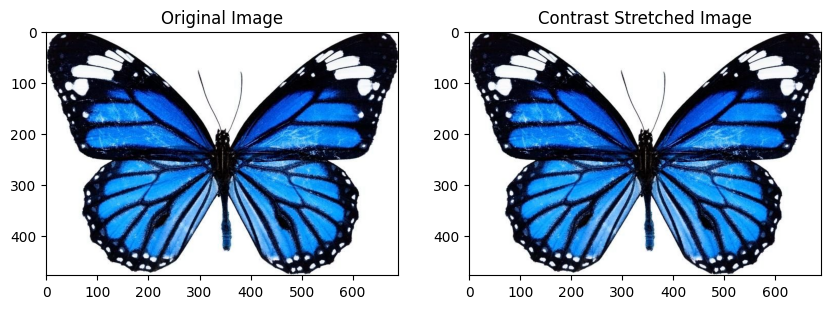

In [11]:
img = cv2.imread('./resources/Butterfly.jpg')

# Apply contrast stretching
minmax_img = np.zeros(img.shape, dtype = 'uint8')

minmax_img = cv2.normalize(img, minmax_img, 0, 255, cv2.NORM_MINMAX)

# Plot the output
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(minmax_img, cmap='gray'), plt.title('Contrast Stretched Image')
plt.show()


# Thresholding
- [Tutorial](https://pyimagesearch.com/2021/04/28/opencv-thresholding-cv2-threshold/)
- [OTSU Threshold](https://snyk.io/advisor/python/skimage/functions/skimage.filters.threshold_otsu)

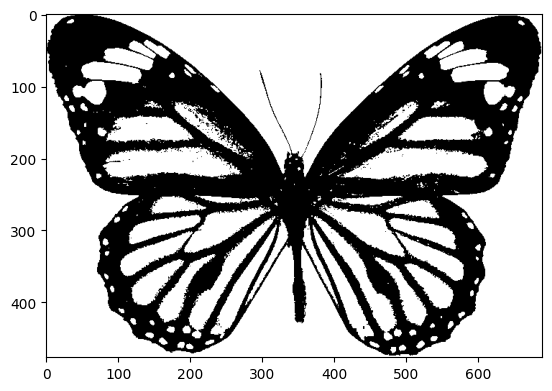

In [12]:
img = cv2.imread('./resources/Butterfly.jpg', 0)

ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

plt.imshow(thresh1, cmap='gray')
plt.show()

# Resizing and Interpolation
- [From here](https://annmay10.medium.com/resizing-images-using-various-interpolation-techniques-4b99800999f2)

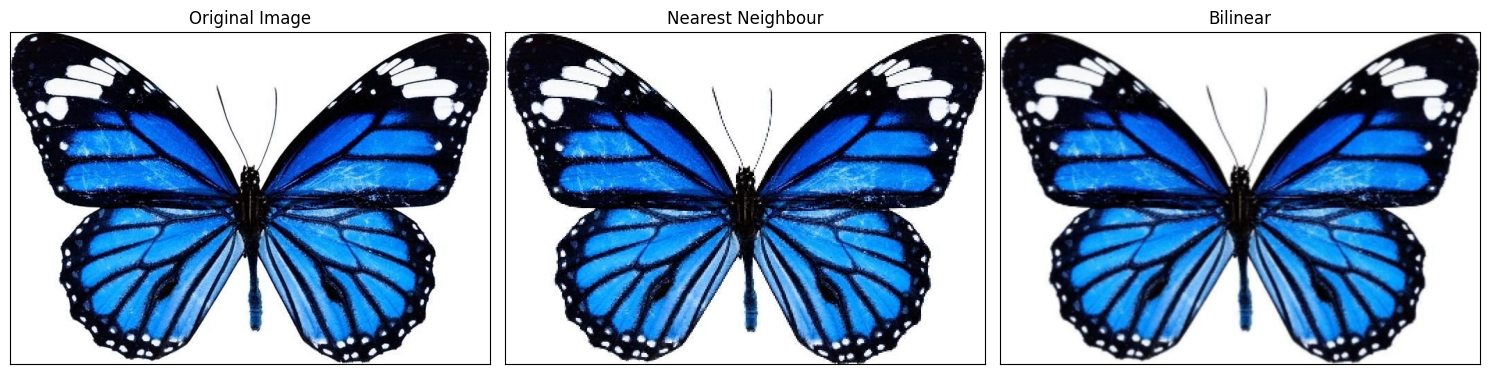

In [7]:
img = cv2.imread('./resources/Butterfly.jpg', -1)

# Nearest Neighbour Interpolation
h, w, c = img.shape
img_n = cv2.resize(img, (w//2, h//2), interpolation = cv2.INTER_NEAREST)
img_n = cv2.resize(img_n, (w, h), interpolation = cv2.INTER_NEAREST)


# Bilinear Interpolation
img_b = cv2.resize(img, (w//2, h//2), interpolation = cv2.INTER_LINEAR)
img_b = cv2.resize(img_b, (w, h), interpolation = cv2.INTER_LINEAR)

# Bicubic Interpolation
img_c = cv2.resize(img, (w//2, h//2), interpolation = cv2.INTER_CUBIC)
img_c = cv2.resize(img_c, (w, h), interpolation = cv2.INTER_CUBIC)


fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax = axis.ravel()

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(img_n)
ax[1].set_title('Nearest Neighbour')
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].imshow(img_b)
ax[2].set_title('Bilinear')
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.tight_layout()

# Image Format

In [9]:
cv2.imwrite('output.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 0])

True